# 📺 Netflix Data Analysis
Analysis of Netflix content with 13 key questions using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [7]:
netflix = pd.read_csv('Netflix-Analysis.csv')

In [9]:
netflix.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 1. What is the shape of the dataset (rows, columns)?

In [12]:
netflix.shape

(7789, 11)

### 2. What are the data types and missing values?

In [15]:
netflix.info()
netflix.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

### 3. How many Movies and TV Shows are there?

In [18]:
netflix['Category'].value_counts()

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

### 4. What are the top 10 most common countries producing Netflix content?

In [21]:
netflix['Country'].value_counts().head(10)

Country
United States     2556
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64

### 5. What are the most frequent content ratings?

In [30]:
netflix['Rating'].value_counts().head(10)

Rating
TV-MA    2865
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
TV-Y7     271
PG        247
TV-G      194
NR         84
Name: count, dtype: int64

### 6. Which year had the most releases on Netflix?

In [37]:
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'], errors='coerce')


In [39]:
netflix['Release_Year'] = netflix['Release_Date'].dt.year

netflix['Release_Year'].value_counts().head(10)

Release_Year
2019.0    2137
2020.0    2009
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
Name: count, dtype: int64

### 7. What are the most common genres/types of shows?

In [42]:
netflix['Type'].value_counts().head(10)

Type
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64

### 8. Which directors have the most titles on Netflix?

In [45]:
netflix['Director'].value_counts().dropna().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: count, dtype: int64

### 9. What is the distribution of movie durations (in minutes)?

In [50]:

netflix['Duration_int'] = netflix['Duration'].str.extract(r'(\d+)').astype(float)
netflix['Duration_unit'] = netflix['Duration'].str.extract(r'([a-zA-Z]+)')


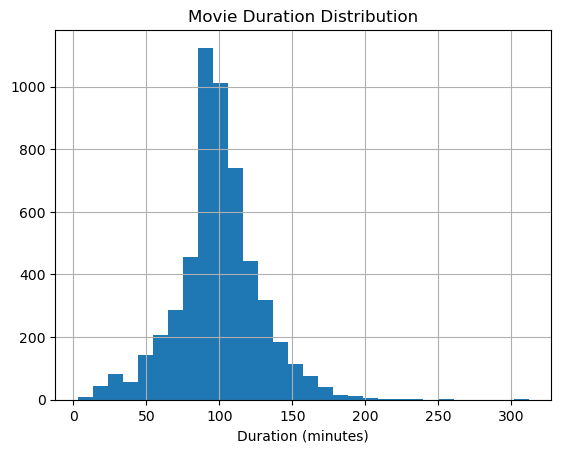

In [52]:
movie_durations = netflix[netflix['Duration_unit'] == 'min']['Duration_int']
movie_durations.hist(bins=30)
plt.xlabel('Duration (minutes)')
plt.title('Movie Duration Distribution')
plt.show()

### 10. How many TV shows have more than 3 seasons?

In [55]:
tv_shows = netflix[netflix['Duration_unit'] == 'Seasons']
tv_shows[tv_shows['Duration_int'] > 3].shape[0]

236

### 11. Which actor appears the most often in Netflix titles?

In [58]:
from collections import Counter

actor_counter = Counter()
netflix['Cast'].dropna().str.split(', ').apply(actor_counter.update)
pd.Series(actor_counter).sort_values(ascending=False).head(10)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
Akshay Kumar        29
Amitabh Bachchan    27
Paresh Rawal        27
Boman Irani         27
Yuki Kaji           27
dtype: int64

### 12. Show the trend of content added over the years

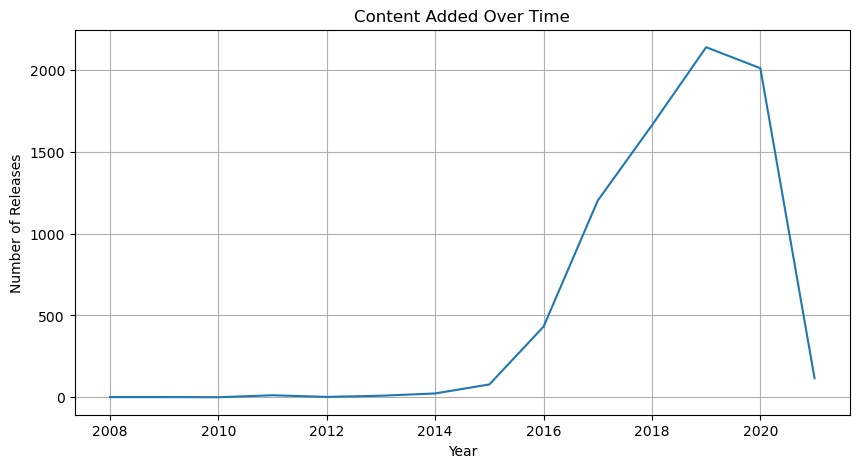

In [61]:
netflix['Release_Year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Content Added Over Time')
plt.grid(True)
plt.show()

### 13. What are the top 10 longest movies on Netflix?

In [64]:
netflix[netflix['Duration_unit'] == 'min'].sort_values(by='Duration_int', ascending=False)[['Title', 'Duration']].head(10)

,Title,Duration
957,Black Mirror: Bandersnatch,312 min
6852,The School of Mischief,253 min
4490,No Longer kids,237 min
3694,Lock Your Girls In,233 min
5109,Raya and Sakina,230 min
5377,Sangam,228 min
3521,Lagaan,224 min
3195,Jodhaa Akbar,214 min
6509,The Irishman,209 min
3282,Kabhi Khushi Kabhie Gham,209 min


In [ ]:
credits: datasciencelovers